# Goals
* In this notebook we will implement and explore the cost function for linear
regressions with one variable.

# Tools
In this analysis we will make use of:
* NumPy
* Matplotlib
* Local plotting routines in lab_utils_uni.py

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')
%matplotlib inline

# Problem Statement
We need to build a model that can predict housing prices given the size of the house. Let's use two houses for this example, one that is 1000 sq ft that sold for 300,000 and one that is 2000 sq ft that sold for 500,000

In [15]:
x_train = np.array([1.0, 2.0])            #(size in 1000 sq ft)
y_train = np.array([300.0, 500.0])        #(price in 1000s of dollars)

## Computing Cost
The term 'cost' in this analysis might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note: Summation ranges are typically from 1 to m, while code will be from 0 to m-1.

The code below calculates cost by looping over each example. In each loop:

* f_wb, a prediction is calculated
* the difference between the target and the prediction is calculated and squared
* this is added to the total cost

In [16]:
def compute_cost (x, y, w, b):
  """
  Computes the cost function for linear regression.

  Args:
    x (ndarray (m,)): Data, m examples
    y (ndarray (m,)): Target values
    w,b (scalar)    : Model parameters

  Returns
    total_cost (float): The cost of using w,b as the parameters for linear regression
                       to fit the data points in x and y
  """
  # number of training examples
  m = x.shape[0]

  cost_sum = 0
  for i in range(m):
    f_wb = w * x[i] + b
    cost = (f_wb - y[i]) ** 2
    cost_sum = cost_sum + cost
  total_cost = 1 / (2 * m) * cost_sum

  return total_cost

# Cost Function Intuition

The goal now is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. In this simple two point example with limited variables, it's relatively easy to be able to achieve this

Let's set $b$ to 100 and focus on $w$.

>Below, use the slider control to select the value of $w$ that minimizes cost. It can take a few seconds for the plot to update.

In [17]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

The plot contains a few points that are worth mentioning.
- Cost is minimized when $w = 200$
- Because the difference between the target and pediction is squared in the cost equation, the cost increases rapidly when $w$ is either too large or too small.
- Using the `w` and `b` selected by minimizing cost results in a line which is a perfect fit to the data.

## Cost Function Visualization- 3D

Now we can see how cost varies with respect to *both* `w` and `b` by plotting in 3D or using a contour plot.

### Larger Data Set
It is instructive to view a scenario with a few more data points. This data set includes data points that do not fall on the same line. What does that mean for the cost equation? Can we find $w$, and $b$ that will give us a cost of 0?

In [18]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.0])
y_train = np.array([250, 300, 480, 430, 630, 730])

In the contour plot, click on a point to select `w` and `b` to achieve the lowest cost. Use the contours to guide your selections. Note, it can take a few seconds to update the graph.

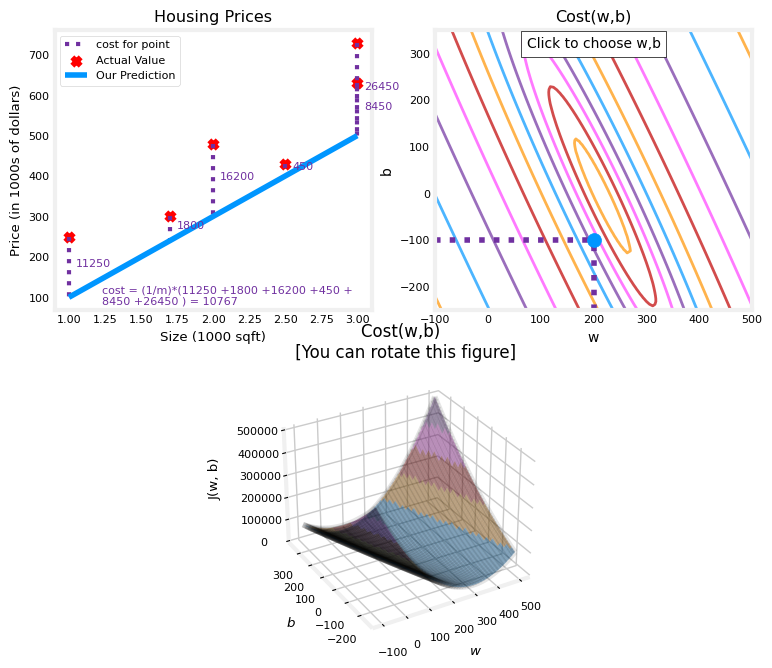

In [26]:
plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

Above, note the dashed lines in the left plot. These represent the portion of the cost contributed by each example in the training set we built. In this case, values of approximately  𝑤=209
  and  𝑏=2.4
  provide low cost. Note that, because our training examples are not on a line, the minimum cost is not zero.

# Congratulations!
You have learned the following:
 - The cost equation provides a measure of how well your predictions match your training data.
 - Minimizing the cost can provide optimal values of $w$, $b$.